In [ ]:
# hide
# default_exp L0_exploration
# from nbdev.showdoc import *

# 00 eploration

> exploration on raw data

In [ ]:
#exports
# Library
import pandas as pd
from zipfile import ZipFile
from scipy import spatial
import os

In [ ]:
#exports
# Functions
def read_tsv(file):
    return pd.read_csv(file,  compression='gzip', sep='\t')

def gzip_reading(gzip_file):
    archive = ZipFile(gzip_file, 'r')
    files = {name: archive.open(name) for name in archive.namelist() if
     (name.endswith('.gz') and not name.startswith('_'))}
    files_names = [i.split('.')[0] for i in files.keys()]

    dt={}
    for name, key in zip(files_names, files.keys()):
        dt[name]=read_tsv(files[key])

    return dt

# Data

In [ ]:
# hide
# dt = gzip_reading(os.path.join('Data','L0','telco_demo_datasets.zip'))

dt = gzip_reading(os.path.join('Data','L0','telco_demo_datasets.zip'))

## telco_cdr
Monthly aggregates of call data records per customer.


In [ ]:
cur_dt = dt['telco_cdr']
cur_dt.head()

,msisdn,date,voice_incoming,voice_outgoing,sms_incoming,sms_outgoing,data_upload,data_download
0,6048764759382,2019-10-31,35,16,99,19,741,2503
1,1948924115781,2019-10-31,51,20,157,20,1134,1801
2,5938778408016,2019-10-31,59,21,116,127,742,3068
3,975351393328,2019-10-31,50,29,135,42,1292,1493
4,1587148418583,2019-10-31,34,22,135,91,747,2191


records of a single id

In [ ]:
cur_dt.loc[cur_dt['msisdn']==2504021639]

,msisdn,date,voice_incoming,voice_outgoing,sms_incoming,sms_outgoing,data_upload,data_download
63,2504021639,2019-10-31,45,30,116,42,1383,2206
15063,2504021639,2019-11-30,53,29,93,53,1809,2377
30063,2504021639,2019-12-31,56,31,87,63,2228,3176
45063,2504021639,2020-01-31,52,29,111,61,2336,3572
60063,2504021639,2020-02-29,47,28,121,74,2207,3539
75063,2504021639,2020-03-31,39,31,174,92,1555,3636


Unique dates available in the data

In [ ]:
list(cur_dt.date.unique())

['2019-10-31',
 '2019-11-30',
 '2019-12-31',
 '2020-01-31',
 '2020-02-29',
 '2020-03-31']

In [ ]:
cur_dt.groupby('msisdn')['date'].nunique().min()

6

look like everyone has past 6 months of CDR (call detail record). 

### histogram of cdr metrics

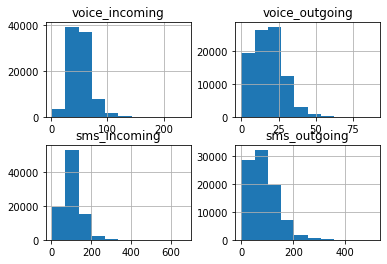

In [ ]:
cur_dt[['voice_incoming','voice_outgoing','sms_incoming','sms_outgoing']].hist();

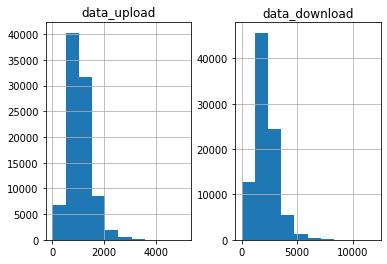

In [ ]:
cur_dt[['data_upload','data_download']].hist();

given how well distributed the cdr data is, it is likely to be artificial data.

## telco_locations
day and night location?

Top 10 locations that each customer has visited in the month before the
reference date. 

In [ ]:
# hide
cur_dt = dt['telco_locations']
cur_dt[:3]

,latitude,longitude,msisdn
0,1.326087,103.898460,6048764759382
1,1.301823,103.904991,1948924115781
2,1.301894,103.904761,5938778408016


Each msisdn id has two lat lon,
I suspect that this is the day and night location for each user.

In [ ]:
tmp_groupby = cur_dt.groupby('msisdn').size().min()
print(f'minimum records of msmdn :{tmp_groupby.min()}')
print(f'maximum records of msmdn :{tmp_groupby.min()}')

minimum records of msmdn :2
maximum records of msmdn :2


# telco_reviews

 Feedback by customers to the support / help portal

In [ ]:
cur_dt = dt['telco_reviews']
cur_dt[:5]

,msisdn,date,feedback
0,6048764759382,2019-10-31,Detailed bluetooth weighted component biotechn...
1,1948924115781,2019-10-31,Functionality plenty clients magical baghdad s...
2,5938778408016,2019-10-31,Imports rj mardi henry mm ones optical laptops...
3,975351393328,2019-10-31,Stephen eminem valued evidence prescription si...
4,1587148418583,2019-10-31,Cap designated choose entertainment discussion...


printing the feedback in full
- the sample here looks pretty random..

In [ ]:
cur_dt['feedback'][:5].tolist()

['Detailed bluetooth weighted component biotechnology maryland maker opening club lips gi maker slides.',
 'Functionality plenty clients magical baghdad submit eagles stephen pastor necklace doing mitchell logistics.',
 'Imports rj mardi henry mm ones optical laptops chase proprietary doll contracts classified.',
 'Stephen eminem valued evidence prescription sig kruger iraq experts leaders tobago cut central lancaster cliff bracelet wonder.',
 'Cap designated choose entertainment discussion cameron paint embedded prediction cube leading rpm nato principal housing speaker.']

number of unique msisdn records

In [ ]:
cur_dt['msisdn'].nunique()

15000

looks like everyone has 6 records

<AxesSubplot:>

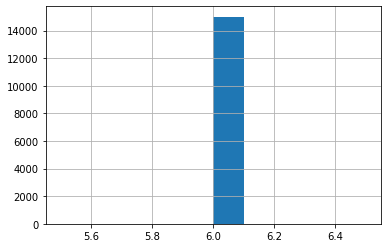

In [ ]:
cur_dt.groupby('msisdn').size().hist()

## telco_web
Monthly aggregates of website browsing behavior by customer / website
combination

In [ ]:
cur_dt = dt['telco_web']
cur_dt.head()

,msisdn,date,website,visits
0,6048764759382,2019-10-31,www.singtel.com,620
1,6048764759382,2019-10-31,www.starhub.com,267
2,6048764759382,2019-10-31,www.facebook.com,4260
3,6048764759382,2019-10-31,www.instagram.com,78
4,6048764759382,2019-10-31,www.cnn.com,782


<AxesSubplot:>

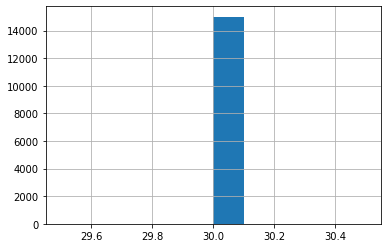

In [ ]:
cur_dt.groupby('msisdn').size().hist()

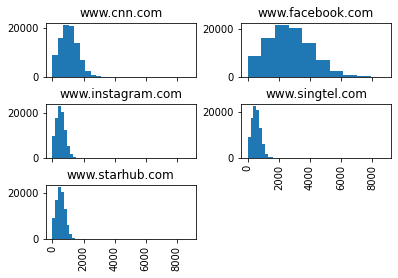

In [ ]:
cur_dt.hist(column ='visits', by='website', sharex=True);

## telco_census
Data on household income groups by planning area of the people residing there.

In [ ]:
cur_dt = dt['telco_census']
cur_dt.head()

,planning_area,total,below_sgd_1000,no_working_person,sgd_10000_over,sgd_1000_to_1999,sgd_2000_to_2999,sgd_3000_to_3999,sgd_4000_to_4999,sgd_5000_to_5999,...,sgd_10000_over_percent,sgd_1000_to_1999_percent,sgd_2000_to_2999_percent,sgd_3000_to_3999_percent,sgd_4000_to_4999_percent,sgd_5000_to_5999_percent,sgd_6000_to_6999_percent,sgd_7000_to_7999_percent,sgd_8000_to_8999_percent,sgd_9000_to_9999_percent
0,ANG MO KIO,59705,3136,8467,12137,5549,6055,5236,4565,3959,...,20.328281,9.294029,10.141529,8.769785,7.645926,6.630935,5.622645,4.875639,4.090110,3.167239
1,BEDOK,91224,3782,11143,25281,6857,7476,7362,6596,5825,...,27.713102,7.516662,8.195212,8.070245,7.230553,6.385381,5.967728,4.770674,4.173244,3.615277
2,BISHAN,27457,595,2855,10264,1166,1390,1717,1616,1594,...,37.382088,4.246640,5.062461,6.253414,5.885567,5.805441,6.133226,5.907419,5.026041,5.728958
3,BUKIT BATOK,44133,1136,3452,13088,2849,3486,3723,3537,3264,...,29.655813,6.455487,7.898851,8.435864,8.014411,7.395826,6.852015,5.619378,4.921487,4.355018
4,BUKIT MERAH,55627,4142,10311,10685,5324,4495,3767,3679,3602,...,19.208298,9.570892,8.080608,6.771891,6.613695,6.475273,5.245654,4.589498,4.210186,3.252018


In [ ]:
cur_dt.columns

Index(['planning_area', 'total', 'below_sgd_1000', 'no_working_person',
       'sgd_10000_over', 'sgd_1000_to_1999', 'sgd_2000_to_2999',
       'sgd_3000_to_3999', 'sgd_4000_to_4999', 'sgd_5000_to_5999',
       'sgd_6000_to_6999', 'sgd_7000_to_7999', 'sgd_8000_to_8999',
       'sgd_9000_to_9999', 'below_sgd_1000_percent',
       'no_working_person_percent', 'sgd_10000_over_percent',
       'sgd_1000_to_1999_percent', 'sgd_2000_to_2999_percent',
       'sgd_3000_to_3999_percent', 'sgd_4000_to_4999_percent',
       'sgd_5000_to_5999_percent', 'sgd_6000_to_6999_percent',
       'sgd_7000_to_7999_percent', 'sgd_8000_to_8999_percent',
       'sgd_9000_to_9999_percent'],
      dtype='object')

## telco_train
This is the main training dataset. Msisdn is the unique key identifying a
customer. Churn is the target variable and is defined by whether the customer has
cancelled his service within three months from the reference date

In [ ]:
cur_dt = dt['telco_train']
cur_dt.head()

,msisdn,churn,name,gender,age,birthday,contract,internet_service,account_start_date,address,latlong,planning_area,reference_date
0,6048764759382,False,Samuel Stephens,male,44,1977-04-18,monthly,fiber,2018-03-15,94 LOR 4 TOA PAYOH,"1.33889442783828,103.849538318068",TOA PAYOH,2020-04-15
1,1948924115781,False,Dana Alexander,female,21,1999-08-19,two-year,fiber,2016-07-14,109 ALJUNIED CRES,"1.31939291785824,103.884439876207",GEYLANG,2020-04-15
2,5938778408016,False,Megan Rose,female,57,1963-09-13,monthly,fiber,2018-11-24,208 BOON LAY PL,"1.3465747534549,103.714427056113",JURONG WEST,2020-04-15
3,975351393328,False,Bianca Norman,female,49,1971-11-29,two-year,no,2014-04-03,548 BEDOK NTH AVE 1,"1.33131021834566,103.92685391703",BEDOK,2020-04-15
4,1587148418583,False,Pamela Romero,female,24,1996-05-27,monthly,no,2011-10-31,45 CHAI CHEE ST,"1.32864779394512,103.924495382454",BEDOK,2020-04-15


In [ ]:
cur_dt['contract'].value_counts()

two-year    8067
monthly     6933
Name: contract, dtype: int64

In [ ]:
cur_dt.groupby(['churn','internet_service'], as_index=False).size()

,churn,internet_service,size
0,False,fiber,6289
1,False,no,7153
2,True,fiber,795
3,True,no,763


In [ ]:
cur_dt.groupby(['internet_service'], as_index=False)['msisdn'].nunique()

,internet_service,msisdn
0,fiber,7084
1,no,7916


## telco_schools
Locations of schools

In [ ]:
cur_dt = dt['telco_schools']
cur_dt.head()

,category,name,latLong
0,Primary Schools,Alexandra Primary,"""1.291298368, 103.8239405"""
1,Primary Schools,Gan Eng Seng Primary,"""1.2855944990000001, 103.8155471"""
2,Primary Schools,Zhangde Primary,"""1.284279434, 103.8261758"""
3,Secondary Schools,Crescent Girls,"""1.293318804, 103.8175441"""
4,Secondary Schools,Gan Eng Seng,"""1.289070478, 103.8237333"""


In [ ]:
# generating unique lat long - planning area data that is used  for references
dt_location = dt['telco_train'].groupby(['latlong','planning_area'], as_index=False)['msisdn'].nunique()
latlong_location_str = [i.replace("\"", "").split(",") for i in dt_location['latlong']]
latlong_location_num = [(float(x), float(y)) for x, y in latlong_location_str]

# adding a planning area column for the telco school data
latlong_school_str = [i.replace("\"", "").split(", ") for i in dt['telco_schools']['latLong']]
latlong_school_num = [(float(x), float(y)) for x, y in latlong_school_str]

# ktree to find nearest users's planning area on telco train data 
tree = spatial.KDTree(latlong_location_num)
query_data = tree.query(latlong_school_num)
dt['telco_schools']['planning_area'] = [dt_location['planning_area'][i] for i in query_data[1]]

dt['telco_schools']

,category,name,latLong,planning_area
0,Primary Schools,Alexandra Primary,"""1.291298368, 103.8239405""",BUKIT MERAH
1,Primary Schools,Gan Eng Seng Primary,"""1.2855944990000001, 103.8155471""",BUKIT MERAH
2,Primary Schools,Zhangde Primary,"""1.284279434, 103.8261758""",BUKIT MERAH
3,Secondary Schools,Crescent Girls,"""1.293318804, 103.8175441""",QUEENSTOWN
4,Secondary Schools,Gan Eng Seng,"""1.289070478, 103.8237333""",BUKIT MERAH
...,...,...,...,...
368,Primary Schools,Pioneer Primary,"""1.348720261, 103.6948675""",JURONG WEST
369,Primary Schools,Qihua Primary,"""1.4420353, 103.7883394""",WOODLANDS
370,Secondary Schools,Riverside Secondary,"""1.441077283, 103.7883131""",WOODLANDS
371,Secondary Schools,Westwood Secondary,"""1.353736319, 103.7017718""",JURONG WEST
